# Installing requisite libraries
## using the same tensorflow pre-trained model and mediapipe

In [10]:
# Step 1: Install the required libraries
!pip install mediapipe opencv-python tensorflow 2&> /dev/null

# Step 2: Import necessary libraries
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

## Drawing a bounding box for both eyes.

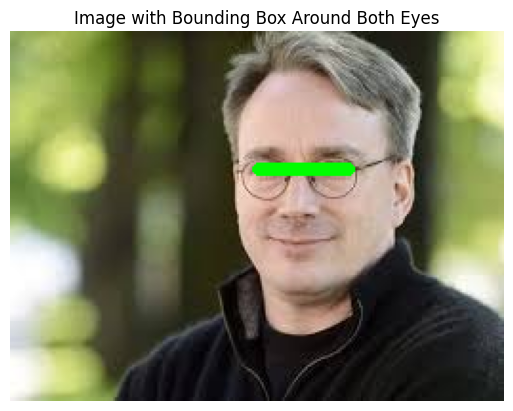

In [7]:
# Step 3: Initialize MediaPipe Face Mesh and drawing utilities
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Step 4: Load the image
image_path = '/content/linus.jpeg'  # Update with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Initialize Face Mesh Model
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True) as face_mesh:
    # Step 6: Process the image and detect facial landmarks
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        # Access the facial landmarks
        face_landmarks = results.multi_face_landmarks[0]

        # Step 7: Define eye landmark indices (based on MediaPipe's face mesh model)
        left_eye_indices = [33, 133, 144, 145, 153, 154, 155, 163]  # Left eye
        right_eye_indices = [263, 362, 373, 374, 380, 381, 382, 390]  # Right eye

        # Extract left eye landmarks
        left_eye_coords = np.array([(int(face_landmark.x * image.shape[1]), int(face_landmark.y * image.shape[0]))
                                    for i, face_landmark in enumerate(face_landmarks.landmark) if i in left_eye_indices])

        # Extract right eye landmarks
        right_eye_coords = np.array([(int(face_landmark.x * image.shape[1]), int(face_landmark.y * image.shape[0]))
                                    for i, face_landmark in enumerate(face_landmarks.landmark) if i in right_eye_indices])

        # Combine both left and right eye coordinates
        both_eyes_coords = np.vstack((left_eye_coords, right_eye_coords))

        # Step 8: Calculate the bounding box that includes both eyes
        def bounding_box(eye_coords):
            x_min = np.min(eye_coords[:, 0])
            y_min = np.min(eye_coords[:, 1])
            x_max = np.max(eye_coords[:, 0])
            y_max = np.max(eye_coords[:, 1])
            return x_min, y_min, x_max, y_max

        # Get bounding box for both eyes
        both_eyes_box = bounding_box(both_eyes_coords)

        # Step 9: Draw rectangle around both eyes
        def draw_rectangle(image, box, color=(0, 255, 0), thickness=3):
            x_min, y_min, x_max, y_max = box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

        # Draw rectangle for both eyes on the original image
        draw_rectangle(image, both_eyes_box)

        # Step 10: Display the image with the rectangle around both eyes
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with Bounding Box Around Both Eyes")
        plt.axis('off')  # Hide the axis
        plt.show()

    else:
        print("No face detected!")


## Cropping only the eyes.

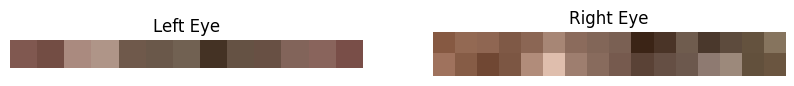

In [9]:
# Step 3: Initialize MediaPipe Face Mesh and drawing utilities
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Step 4: Load the image
image_path = '/content/linus.jpeg'  # Update with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Initialize Face Mesh Model
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True) as face_mesh:
    # Step 6: Process the image and detect facial landmarks
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        # Access the facial landmarks
        face_landmarks = results.multi_face_landmarks[0]

        # Step 7: Define eye landmark indices (these are based on MediaPipe's face mesh model)
        left_eye_indices = [33, 133, 144, 145, 153, 154, 155, 163]  # Left eye
        right_eye_indices = [263, 362, 373, 374, 380, 381, 382, 390]  # Right eye

        # Extract left eye landmarks
        left_eye_coords = np.array([(int(face_landmark.x * image.shape[1]), int(face_landmark.y * image.shape[0]))
                                    for i, face_landmark in enumerate(face_landmarks.landmark) if i in left_eye_indices])

        # Extract right eye landmarks
        right_eye_coords = np.array([(int(face_landmark.x * image.shape[1]), int(face_landmark.y * image.shape[0]))
                                    for i, face_landmark in enumerate(face_landmarks.landmark) if i in right_eye_indices])

        # Step 8: Calculate bounding boxes for both eyes
        def bounding_box(eye_coords):
            x_min = np.min(eye_coords[:, 0])
            y_min = np.min(eye_coords[:, 1])
            x_max = np.max(eye_coords[:, 0])
            y_max = np.max(eye_coords[:, 1])
            return x_min, y_min, x_max, y_max

        left_eye_box = bounding_box(left_eye_coords)
        right_eye_box = bounding_box(right_eye_coords)

        # Step 9: Crop the image to the eyes' regions
        left_eye_image = image[left_eye_box[1]:left_eye_box[3], left_eye_box[0]:left_eye_box[2]]
        right_eye_image = image[right_eye_box[1]:right_eye_box[3], right_eye_box[0]:right_eye_box[2]]

        # Step 10: Display cropped eye regions
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(left_eye_image, cv2.COLOR_BGR2RGB))
        plt.title("Left Eye")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(right_eye_image, cv2.COLOR_BGR2RGB))
        plt.title("Right Eye")
        plt.axis('off')

        plt.show()

    else:
        print("No face detected!")


### Now texture analysis has to be done..